---

<left> <b> Copyright 2022, Ervin Kurbegovic, All rights reserved. </b> </left>

---

<left> <h3> Case Study: „Master Data Science, Module 2: Analyzing Formula 1 Data“ </h3> </left>
<left> <h3> Professor:               Prof. Dr. Gottfried Vossen </h3> </left>
<left> <h3> Student:                 Ervin Kurbegovic </h3> </left>
<left> <h3> Submission date:         28 March, 2022 </h3> </left>

#### Starting situation
In this case study, you will play with Formula 1 data. The data we will work with is from FastF1
(https://theoehrly.github.io/Fast‐F1/), which gives you access to F1 lap timing, car telemetry
and position, tire data, weather data and weekend information among others. No Formula 1
account is needed. The module is designed around Pandas, Numpy and Matplotlib. This makes
it easy to use while offering lots of possibilities for data analysis and visualization. FastF1
handles big chunks of data (~50‐100MB per session) so most of the information is stored
locally as cached requests (be aware).
It is recommended to install FastF1 using pip (pip install fastf1) and to familiarize yourself with
FastF1 before turning to the case study. Note that Python 3.8 or higher is required. Note that
you can change between Python versions using the Anaconda Navigator(detailed instructions:
https://docs.anaconda.com/anaconda/navigator/tutorials/use‐multiple‐python‐versions/).
For this case study, we will look at the <b>2021 Abu Dhabi Grand Prix</b>. Specifically, we will analyze
the <b>qualification session</b>, during which Max Verstappen and Lewis Hamilton were going neck‐
2‐neck like they had done all season. Eventually, Verstappen beat Hamilton to pole position
with 0,371 seconds. <b>Your goal is to see how you can analyze this final lap and find the
difference.</b>
Do the following:
1. Enable the cache
2. Setup plotting
3. Load the data and get the laps
4. Study the data to get an understanding of it
5. Select the specific data you are interested in (e.g., Hamilton, Verstappen, fastest lap,
etc.)
6. Construct a single DataFrame called telemetry
7. Break the length of the lap into minisectors of equal size and create a list of all
distances at which the next minisector starts
8. Assign a minisector to every row in the dataset and answer the question “in which
minisector was the car at the moment the datapoint was recorded?”
9. Calculate the fastest driver per minisector: calculate the average speed per driver per
minisector, select the driver with the highest average speed, and join the fastest
driver per minisector with the telemetry data.
Obviously, there are still a few roadblocks to circumvent before you get to the result, which
should be a plot showing who, Hamilton or Verstappen, was faster in which minisector.
Hints:  
1. Before you start, you may want to take a look at the tutorial for beginners.
2. Use the following libraries: fastf1, matplotlib, pandas, numpy.
Please submit a complete package consisting of code, dataset, and output so that your results can
easily be verified.

Before we start to explore the case study, we need to load the following python libraries:
* **pandas** for fast, powerful, flexible and easy to use open source data analysis and manipulation tool
* **numpy** brings the computational power of languages like C and Fortran to Python
* **plotly.express** is a terse, consistent, high-level API for creating figures 
* **FastF1** retrieves Formula 1 data from an API

In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# import python packages
import pandas as pd
import numpy as np
import plotly.express as px 
import fastf1
from fastf1 import plotting
from fastf1 import utils
import matplotlib
from matplotlib import rcParams
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# 0. increase the output of the rows and columns of the data frames
pd.set_option("display.max_columns", 5000)
pd.set_option("display.max_rows", 5000)

# 1. Enable caching
fastf1.Cache.enable_cache('cache_directory')

# 2. Setup potting
fastf1.plotting.setup_mpl()

/home/ervin/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ervin/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


<b>3. Loading the data</b>

In [5]:
# 3.1 retrieving the 2021 Abu Dhabi Grand Prix qualitication data
data = fastf1.get_session(2021, 'Abu Dhabi', 'Q')

# 3.2 retrieving the laps
laps = data.load_laps(with_telemetry=True)

# 3.3 retrieving the driver data
driver_verstappen = data.get_driver('VER')
driver_hamilton = data.get_driver('HAM')

/home/ervin/.local/lib/python3.9/site-packages/fastf1/core.py:1093: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '4', '11', '55', '77', '16', '22', '31', '3', '14', '10', '18', '99', '5', '6', '63', '7', '4

<b>4. Study the data to get an understanding of it</b>

In [6]:
# 4.1 Looking into the help
?laps
#help(laps) 

# 4.2 Studying the functions
laps.pick_fastest().keys()
laps.pick_fastest()
dir(data)
data.car_data
data.date
data.drivers
data.name
data.pos_data
data.results
data.t0_date
data.weather_data
weekend = data.event
weekend.OfficialEventName
data.event['EventName']
#data.pos_data['44']

'Abu Dhabi Grand Prix'

Type:        Laps
String form:
Time DriverNumber                LapTime  LapNumber
           0   0 days 00:17:13. <...> 7.206
           325 2021-12-11 13:16:52.092
           326 2021-12-11 13:18:57.549
           327 2021-12-11 13:20:23.234
Length:      328
File:        ~/.local/lib/python3.9/site-packages/fastf1/core.py
Docstring:  
Object for accessing lap (timing) data of multiple laps.

Args:
    *args (any): passed through to :class:`pandas.DataFrame` super class
    session (:class:`Session`): instance of session class; required for
      full functionality
    **kwargs (any): passed through to :class:`pandas.DataFrame`
      super class

This class allows for easily picking specific laps from all laps in a session. It implements some additional
functionality on top off the usual `pandas.DataFrame` functionality. Among others, the laps' associated telemetry
data can be accessed.

If for example you want to get the fastest lap of Bottas you can narrow it down like this::

    i

In [7]:
# 4.3 Looking at the driver data
display(driver_verstappen.LastName)
display(driver_verstappen.Abbreviation)
display(driver_verstappen.FirstName)
display(driver_verstappen.DriverNumber)
display(driver_verstappen.Position)
display(driver_verstappen.TeamName)
display(driver_verstappen.info)

'Verstappen'

'VER'

'Max'

'33'

1.0

'Red Bull Racing'

<bound method Series.info of DriverNumber                         33
BroadcastName              M VERSTAPPEN
Abbreviation                        VER
TeamName                Red Bull Racing
TeamColor                        0600EF
FirstName                           Max
LastName                     Verstappen
FullName                 Max Verstappen
Position                            1.0
GridPosition                        0.0
Q1               0 days 00:01:23.322000
Q2               0 days 00:01:22.800000
Q3               0 days 00:01:22.109000
Time                                NaT
Status                                 
Points                              0.0
Name: Max, dtype: object>

<b>5. Select the specific data you are interested in (e.g., Hamilton, Verstappen, fastest lap,
etc.)</b>

Although there are some excursions in the coming analysis, the focus is on Hamilton and Verstappen in particular on their fastest laps.


First, we look at the fastest laps of the drivers and rank the top ten.

In [8]:
# 5.1 Selection of the 10 fastest laps driven
laps_top_ten = laps[['LapTime', 'Driver', 'Team', 'DriverNumber']].sort_values(by='LapTime').head(10).reset_index(drop=True)
laps_top_ten.columns = [i.title() for i in laps_top_ten.columns]

# 5.2 Calculation of the time difference to the fastest driven lap
laps_top_ten['Time Diff Previous Driver'] = laps_top_ten['Laptime'].diff(periods=1)
laps_top_ten.loc[:0,'Time Diff Previous Driver'] = pd.Timedelta(0)

# The cumsum function is needed to compare the time with the first round, otherwise the time of the previous row would be compared
laps_top_ten['Time Diff fastest Driver'] = laps_top_ten['Time Diff Previous Driver'].cumsum()
laps_top_ten.loc[:0,'Time Diff fastest Driver'] = pd.Timedelta(0)
display(laps_top_ten.loc[:,['Driver', 'Time Diff fastest Driver', 'Laptime']])

,Driver,Time Diff fastest Driver,Laptime
0,VER,0 days 00:00:00,0 days 00:01:22.109000
1,HAM,0 days 00:00:00.371000,0 days 00:01:22.480000
2,HAM,0 days 00:00:00.551000,0 days 00:01:22.660000
3,VER,0 days 00:00:00.691000,0 days 00:01:22.800000
4,HAM,0 days 00:00:00.736000,0 days 00:01:22.845000
5,NOR,0 days 00:00:00.822000,0 days 00:01:22.931000
6,PER,0 days 00:00:00.838000,0 days 00:01:22.947000
7,PER,0 days 00:00:00.859000,0 days 00:01:22.968000
8,SAI,0 days 00:00:00.883000,0 days 00:01:22.992000
9,TSU,0 days 00:00:00.902000,0 days 00:01:23.011000


The top 5 positions for the fastest laps are occupied by Verstappen and Hamilton, which could be an indication that the two are also the fastest drivers of the entire race and that a neck-and-neck race is brewing between the two.

In [9]:
# 5.3 How often are the drivers represented in the fastest 10 laps
display(laps_top_ten.groupby('Driver')['Laptime'].count().sort_values(ascending=False))

Driver
HAM    3
PER    2
VER    2
NOR    1
SAI    1
TSU    1
dtype: int64

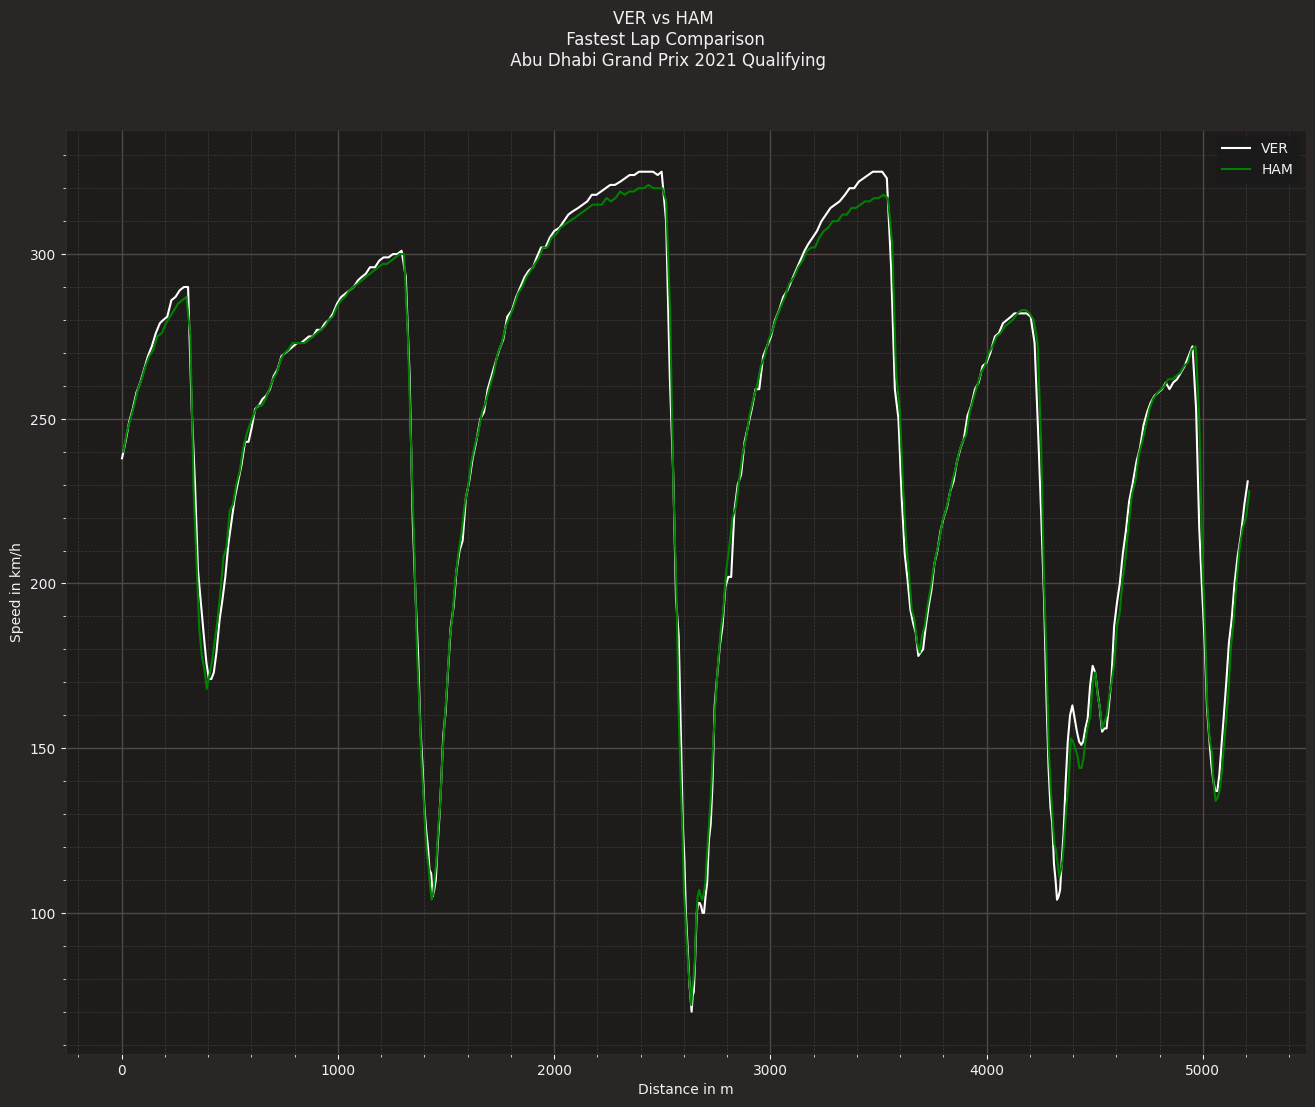

In [10]:
# 5.4 Fastest Lap Comparison HAM vs VER
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

##############################################################################
# First, we select the two laps that we want to compare

ver_lap = laps.pick_driver('VER').pick_fastest()
ham_lap = laps.pick_driver('HAM').pick_fastest()

##############################################################################
# Next we get the telemetry data for each lap. We also add a 'Distance' column
# to the telemetry dataframe as this makes it easier to compare the laps.

ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

##############################################################################
# Finally, we create a plot and plot both speed traces.
# We color the individual lines with the driver's team colors.

rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots(figsize=(16,12))
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color='white', label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color='green', label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"VER vs HAM \n Fastest Lap Comparison \n "
             f"{data.event.EventName} {data.event.year} Qualifying")

plt.show()

If we compare the fastest lap of the two drivers Hamilton and Verstappen, we see how close the drivers are. In the plot you can see that Verstappen achieves a slightly higher speed, but this is not necessarily an indication that he is faster in the entire race. Because the braking, acceleration and tire changes also contribute to how fast he is in the end.

<b> 6. Construct a single DataFrame called telemetry</b>

Before loading and analyzing all the telemetry data, let's take a look at the telemetry data of Verstappen's and Hamilton's fastest laps and see if they give us any further insight into which of them is faster.<br>
We do this by plotting the measured points (see below).

In [11]:
# 4.4 Plotting the telemetry data fastest lap ham vs ver
fast_ver = data.laps.pick_driver('VER').pick_fastest().get_telemetry().add_distance()
fast_ham = data.laps.pick_driver('HAM').pick_fastest().get_telemetry().add_distance()

fig = make_subplots(rows=1, cols=2, shared_xaxes=True, shared_yaxes=True, subplot_titles=(driver_hamilton.FullName, driver_verstappen.FullName),)

fig.add_trace(
    go.Scatter(x=fast_ham.X, y=fast_ham.Y, mode='markers', name=driver_hamilton.FullName, marker=dict(color='green', size=3), showlegend=False),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=fast_ver.X, y=fast_ver.Y, mode='markers', name=driver_verstappen.FullName, marker=dict(color='white', size=3), showlegend=False),
    row=1, col=2
)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.update_layout(height=800, width=1400, template='plotly_dark', title={'text': "Side By Side Telemetry Position Data fastest lap", 'xanchor': 'center', 'x': 0.5, 'font_size':20})
fig.show()

The telemetry data of the two drivers Hamilton and Verstappen could provide the first insights into which of the two is the faster.<br>For example, anomalies could be identified on the basis of the measured and visualized points, i.e. initial indications of who is ahead in certain areas of the track.<br><br> If the points are far apart, the speed is high; if the points are close together, the speed is low.
From the distribution of the points, you can therefore tell when drivers accelerate and when they brake.<br>
Unfortunately, the arrangement of the measured telemetry points looks almost identical, so no information can be extracted.<br>In the further analysis, the division into minisectors and calculating the average speed within the minisector may provide more information.<br><br> So let's continue the analysis...

In [12]:
# 6.1 To create a Telemetry DataFrame with all required variables, e.g. distance, the following steps are required

## Step 1: Store all drivers in one variable 
drivers = pd.unique(laps['Driver'])

## Step 2: Create a completely empty DataFrame 
telemetry = pd.DataFrame()

## Step 3: Loop over the drivers variable and retrieve the data one at a time, since the telemetry data can only be retrieved "driver-by-driver".
for driver in drivers:
    driver_laps = laps.pick_driver(driver)
    
    # Since we want to compare distances, we need to capture the telemetry data lap by lap. In this case, the distance data is recalculated and can be compared lap by lap.
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['LapNumber']
        frames = [telemetry, driver_telemetry] 
        telemetry = pd.concat(frames, ignore_index=True)

In [13]:
# 6.1 Checking Telemetry DataFrame
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Lap
0,2021-12-11 13:00:18.064,0 days 00:15:17.880000,,17.228889,0 days 00:00:00,3611.0,32.0,1.0,0.0,False,8.0,interpolation,-1.708593e-07,OnTrack,4270.161611,2969.164055,3.040132e-163,0.000000,VER,1
1,2021-12-11 13:00:18.209,0 days 00:15:18.025000,,17.228889,0 days 00:00:00.145000,3594.0,32.0,1.0,0.0,False,8.0,pos,2.607374e-04,OnTrack,4267.000000,2982.000000,0.000000e+00,1.288889,VER,1
2,2021-12-11 13:00:18.267,0 days 00:15:18.083000,,17.228889,0 days 00:00:00.203000,3560.0,32.0,1.0,0.0,False,8.0,car,3.653712e-04,OnTrack,4265.000000,2986.000000,0.000000e+00,1.804444,VER,1
3,2021-12-11 13:00:18.429,0 days 00:15:18.245000,,17.228889,0 days 00:00:00.365000,3496.0,32.0,1.0,0.0,False,8.0,pos,6.581168e-04,OnTrack,4262.000000,3000.000000,0.000000e+00,3.244444,VER,1
4,2021-12-11 13:00:18.507,0 days 00:15:18.323000,16,17.228889,0 days 00:00:00.443000,3433.0,32.0,1.0,0.0,False,8.0,car,7.973372e-04,OnTrack,4260.000000,3006.000000,0.000000e+00,3.937778,VER,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496402,2021-12-11 13:22:05.469,0 days 00:37:05.285000,22,18.400278,0 days 00:01:42.235000,6968.0,80.0,2.0,98.0,False,8.0,pos,9.979452e-01,OnTrack,360.000000,1902.000000,-2.210000e+02,5198.829444,MAZ,9
496403,2021-12-11 13:22:05.471,0 days 00:37:05.287000,22,18.400278,0 days 00:01:42.237000,6996.0,80.0,2.0,99.0,False,8.0,car,9.979537e-01,OnTrack,360.000000,1902.000000,-2.210000e+02,5198.873889,MAZ,9
496404,2021-12-11 13:22:05.689,0 days 00:37:05.505000,22,18.400278,0 days 00:01:42.455000,7027.0,80.0,2.0,99.0,False,8.0,pos,9.988831e-01,OnTrack,433.000000,1911.000000,-2.210000e+02,5203.718333,MAZ,9
496405,2021-12-11 13:22:05.711,0 days 00:37:05.527000,22,18.400278,0 days 00:01:42.477000,7059.0,80.0,2.0,99.0,False,8.0,car,9.989768e-01,OnTrack,439.000000,1911.000000,-2.200000e+02,5204.207222,MAZ,9


<b>7. Break the length of the lap into minisectors of equal size and create a list of all
distances at which the next minisector starts</b>>

In [14]:
# 7.1 Grouping by lap and driver and aggregating the maximum values to obtain the distance driven for each driver and lap. 
df_f1 = telemetry.groupby(['Lap', 'Driver',]).agg(['max'])

In [34]:
# 7.2 Checking the result
df_f1['Distance'][40:60]

max
Lap Driver             
3   ALO     5183.806944
    BOT     5186.905972
    GAS     5210.991111
    GIO     5208.604167
    HAM     5197.782222
    LAT     5197.255833
    LEC     5219.004167
    MAZ     5211.137222
    MSC     5191.935417
    NOR     5206.757639
    OCO     5212.904167
    PER     5187.319722
    RAI     5221.929722
    RIC     5210.089167
    RUS     5209.607778
    SAI     5209.786389
    STR     5208.422778
    TSU     5216.472500
    VER     5211.538611
    VET     5216.036944

As can be seen above, we have now determined the maximum distance of the lap for each driver. The different distances show that the drivers drive, brake and accelerate differently. It can even happen that some drivers leave the track or are even forced off the track or have to take avoiding action in order not to have an accident.

<b><span style='color:red'>The problem now lies in the comparability due to the different distances driven.</span><br></b>
To contain this problem as much as possible, the calculation of the minisectors for Verstappen and Hamilton can be carried out in two different ways. 

1. The first option is that each of them gets the minisector assignment based on their own average track distance.<br> 
For this we add all driven maximum distances per lap (19 laps) and divide the value by the number of laps, i.e. 19.

2. The second option all distances driven by the two drivers are added and the average track distance is calculated.<br>
To do this, we add up all the maximum distances of each driver (38 laps) and divide them by the number of laps, i.e. 38.<br>

The advantage of the first option is that all the data is available and the distances actually traveled are taken into account.  
On the other hand, the advantage of the second option is that the length of the mini-sectors is standardized and the calculation is easier.

<b>In order not to drag out the analysis unnecessarily, only the first option is selected. Since this option uses all information and based on this option, the second option could be performed afterwards.<b/><br></br>

_(For the calculation of arithmetic means the functions from pandas are used, like the mean() function)_

In [16]:
# Data cleaning
telemetry_clean = telemetry.loc[telemetry['Speed'] > 0].reset_index()

In [17]:
# 7.3 Create the grouped data and delete columns that are no longer needed. 

## In addition, the min, mean and max functions are executed. The mean value will be used later for the calculation of the fastest driver in the minisectors
tele_group = telemetry_clean.drop(columns=['DriverAhead', 'Source', 'Status']).groupby(['Lap', 'Driver',]).agg(['min', 'mean', 'max'])[['RelativeDistance', 'Distance', 'Speed', 'SessionTime', 'DistanceToDriverAhead']]

## The following function calculates the mini sector
def calc_minisector(num):
    num_minisectors = int(num)
    # With a lambda function we geht the total distance and on based Generate equally sized mini-sectors
    # For each lap and each rider, the distance traveled is divided by the given number, so we get the distance of a minisector that is unique for each rider, but also for each lap. 
    # So each lap of each driver has a minisector distance that (very likely) differs slightly from each other. 
    # The reason for this is that the probability of the driver driving the exact same lap (shifting, steering, braking, etc.) tends towards zero.
    tele_group['mini sector distance'] = tele_group['Distance']['max'].apply(lambda x: x/num_minisectors)
    
    return num_minisectors

## Set a value for the mini sector as desired (The value 50 for the mini sector was chosen randomly)
num_minisectors = calc_minisector(50)

In [35]:
# 7.4 Check the result
tele_group.head(10)

RelativeDistance                     Distance                
                        min      mean       max      min         mean   
Lap Driver                                                              
1   ALO       -3.940276e-05  0.540481  0.998696      0.0  2661.062685  \
    BOT        1.583964e-06  0.519462  0.999101      0.0  2560.758265   
    GAS       -1.688235e-06  0.488640  0.997777      0.0  2413.840560   
    GIO        1.567685e-05  0.507021  0.997969      0.0  2501.714716   
    HAM       -8.502829e-09  0.491730  0.999687      0.0  2410.270748   
    LAT        1.276275e-05  0.544613  0.999005      0.0  2677.592313   
    LEC       -2.040571e-06  0.490217  0.999008      0.0  2415.895758   
    MAZ        9.791257e-09  0.473861  0.997302      0.0  2348.013674   
    MSC        1.756795e-05  0.495853  0.996915      0.0  2456.058965   
    NOR        3.424211e-06  0.541418  0.998456      0.0  2670.460932   

                        Speed                               SessionTime   
                    max   min        mean    max                    min   
Lap Driver                                                                
1   ALO     4915.014722  40.0  141.360933  306.0 0 days 00:18:21.878000  \
    BOT     4924.903333  51.0  157.646939  262.0 0 days 00:18:07.905000   
    GAS     4929.273889  34.0  136.296916  299.0 0 days 00:15:14.891000   
    GIO     4923.223056  44.0  146.685958  289.0 0 days 00:15:42.552000   
    HAM     4899.642917  48.0  163.849147  255.0 0 days 00:18:03.961000   
    LAT     4910.226389  49.0  153.985015  316.0 0 days 00:18:25.619000   
    LEC     4924.498889  33.0  143.551532  303.0 0 days 00:15:16.283000   
    MAZ     4942.143611  18.0  137.027409  291.0 0 days 00:15:23.264000   
    MSC     4939.169722  43.0  154.844810  304.0 0 days 00:15:08.732000   
    NOR     4924.402500  40.0  140.069356  303.0 0 days 00:18:30.228000   

                                                              
                                mean                    max   
Lap Driver                                                    
1   ALO    0 days 00:19:24.509706312 0 days 00:20:27.107000  \
    BOT    0 days 00:19:04.130734693 0 days 00:20:00.296000   
    GAS    0 days 00:16:19.892794713 0 days 00:17:24.995000   
    GIO    0 days 00:16:42.916788425 0 days 00:17:43.291000   
    HAM    0 days 00:18:57.703159914 0 days 00:19:51.500000   
    LAT    0 days 00:19:23.017491508 0 days 00:20:20.409000   
    LEC    0 days 00:16:18.053870009 0 days 00:17:19.769000   
    MAZ    0 days 00:16:28.045721485 0 days 00:17:32.881000   
    MSC    0 days 00:16:06.052920159 0 days 00:17:03.413000   
    NOR    0 days 00:19:33.464568449 0 days 00:20:36.650000   

           DistanceToDriverAhead                             
                             min         mean          max   
Lap Driver                                                   
1   ALO                 1.143333   123.589823   284.089444  \
    BOT                17.585278   154.515489   543.871944   
    GAS                 0.870556   149.923658   525.253611   
    GIO                23.543333   168.558279   408.020833   
    HAM               122.910000  1055.316887  1539.672222   
    LAT                 0.190000    81.799099   209.013889   
    LEC                 0.604167   132.030250   440.018056   
    MAZ                20.603333   229.653609   620.416389   
    MSC                16.341667   285.179175   535.291389   
    NOR                78.351944   329.715314   695.758056   

           mini sector distance  
                                 
Lap Driver                       
1   ALO               98.300294  
    BOT               98.498067  
    GAS               98.585478  
    GIO               98.464461  
    HAM               97.992858  
    LAT               98.204528  
    LEC               98.489978  
    MAZ               98.842872  
    MSC               98.783394  
    NOR               98.488050

<b>8. Assign a minisector to every row in the dataset and answer the question “in which
minisector was the car at the moment the datapoint was recorded?”</b>

In [36]:
# 8.1 Grouping the data by driver, so that we can compare the drivers
drivers = telemetry_clean['Driver'].unique().tolist()
df_lap_minisector = [tele_group.iloc[tele_group.index.get_level_values(1) == drv] for drv in drivers]

In [37]:
# 8.2 Since the data is in a list of "DataFrames", they are transferred into one large "DataFrame".
df_lap_minisector_driver = pd.DataFrame()
for i in range(len(drivers)):
    df_lap_minisector_driver = pd.concat([df_lap_minisector_driver, df_lap_minisector[i].reset_index()])
    df_lap_minisector_driver.reset_index(drop=True, inplace=True)

In [38]:
# 8.3 Checking for nan values
df_lap_minisector_driver.loc[(df_lap_minisector_driver['DistanceToDriverAhead'].isna().any(axis=1))]
## The Nan values in the "DistanceToDriverAhead" column can be ignored, i.e. we do not need to consider them

Lap Driver RelativeDistance                     Distance                
                            min      mean       max      min         mean   
58    2    PER     6.061563e-05  0.520215  0.999427      0.0  2720.796606  \
59    3    PER     2.398497e-05  0.528548  0.999482      0.0  2743.189429   
76   20    PER     6.056696e-05  0.518254  0.999445      0.0  2713.936739   
77   21    PER     6.832445e-05  0.539600  0.998982      0.0  2801.286726   
78   22    PER     5.389302e-10  0.425795  0.997970      0.0  2245.328155   
79   23    PER     1.222636e-05  0.520506  0.999814      0.0  2720.495554   
130   8    LEC     6.179395e-06  0.518844  0.998220      0.0  2719.727852   
133  11    LEC     3.387775e-05  0.543922  0.999046      0.0  2824.098155   
246  12    STR     5.788529e-06  0.518909  0.998361      0.0  2714.501997   
247  13    STR     1.873885e-05  0.537672  0.999537      0.0  2787.229781   
250  16    STR     7.989378e-05  0.519205  0.999852      0.0  2713.664573   
273   5    VET     7.755034e-05  0.518364  0.998489      0.0  2712.242297   
284  16    VET     3.335671e-05  0.574058  1.000004      0.0  2626.630332   
286  18    VET     2.971355e-05  0.526641  0.998616      0.0  3360.221244   

                 Speed                               SessionTime   
             max   min        mean    max                    min   
58   5227.373611  66.0  223.311398  320.0 0 days 00:16:45.743000  \
59   5187.319722  61.0  159.345064  277.0 0 days 00:18:09.996000   
76   5233.218333  71.0  226.998623  328.0 0 days 01:09:25.800000   
77   5186.918611  64.0  174.676313  272.0 0 days 01:10:48.768000   
78   5264.145000   1.0  128.369565  303.0 0 days 01:12:35.574000   
79   5225.884722  74.0  226.738621  328.0 0 days 01:16:50.532000   
130  5231.052778  70.0  225.097931  321.0 0 days 00:31:05.517000   
133  5187.509444  62.0  168.116822  273.0 0 days 00:36:22.638000   
246  5221.643611  66.0  223.648098  322.0 0 days 00:45:16.801000   
247  5184.078333  51.0  180.464563  294.0 0 days 00:46:40.877000   
250  5225.546667  67.0  223.760544  322.0 0 days 00:56:39.932000   
273  5223.464583  68.0  222.025204  321.0 0 days 00:22:20.780000   
284  4577.562222   2.0  160.157778  287.0 0 days 00:54:42.184000   
286  6369.541667  68.0  206.269825  323.0 0 days 00:57:54.559000   

                                                     DistanceToDriverAhead   
                         mean                    max                   min   
58  0 days 00:17:27.868518317 0 days 00:18:09.996000                   NaN  \
59  0 days 00:19:08.663315738 0 days 00:20:07.243000                   NaN   
76  0 days 01:10:07.234636363 0 days 01:10:48.768000                   NaN   
77  0 days 01:11:42.229036441 0 days 01:12:35.574000                   NaN   
78  0 days 01:15:31.140154503 0 days 01:16:50.532000                   NaN   
79  0 days 01:17:32.026282758 0 days 01:18:13.479000                   NaN   
130    0 days 00:31:47.441640 0 days 00:32:29.145000                   NaN   
133 0 days 00:37:18.246321910 0 days 00:38:13.664000                   NaN   
246 0 days 00:45:58.826451086 0 days 00:46:40.877000                   NaN   
247 0 days 00:47:32.581094130 0 days 00:48:24.341000                   NaN   
250 0 days 00:57:21.918661224 0 days 00:58:03.998000                   NaN   
273 0 days 00:23:02.946311989 0 days 00:23:45.444000                   NaN   
284 0 days 00:55:33.621308888 0 days 00:56:25.165000                   NaN   
286 0 days 00:58:50.154471678 0 days 00:59:45.810000                   NaN   

             mini sector distance  
    mean max                       
58   NaN NaN           104.547472  
59   NaN NaN           103.746394  
76   NaN NaN           104.664367  
77   NaN NaN           103.738372  
78   NaN NaN           105.282900  
79   NaN NaN           104.517694  
130  NaN NaN           104.621056  
133  NaN NaN           103.750189  
246  NaN NaN           104.432872  
247  NaN NaN           103.681567  
2

In [39]:
# 8.4 For further action we make copys of the telemetry data in case we still need the original data
df_tele_all = telemetry_clean.copy()
df_tele_all2 = df_tele_all.copy()

<b><font color= 'red'><u>Very important:</u> The execution of the next cell took very long on my notebook. 
    <br>The reason for this is that the positon data is pulled for each driver and each lap.</font>

In [40]:
# 8.5 Checking the position data of each driver per lap and assigning the calculated mini-sector based on the measured distance. 
for drv in drivers:
    for lap in range(1, len(set(telemetry_clean['Lap'].loc[telemetry_clean['Driver'] == drv]))+1):
        for mini in range(1, num_minisectors+1):
            mini_sector_value_lower = (df_lap_minisector_driver.loc[(df_lap_minisector_driver['Driver'] == drv) & (df_lap_minisector_driver['Lap'] == lap)]['mini sector distance'].values[0] * (mini-1))
            mini_sector_value_upper = (df_lap_minisector_driver.loc[(df_lap_minisector_driver['Driver'] == drv) & (df_lap_minisector_driver['Lap'] == lap)]['mini sector distance'].values[0] * mini)
            try:
                df_tele_all.loc[(df_tele_all['Driver'] == drv) & (df_tele_all['Lap'] == lap) & (df_tele_all['Distance'] >= mini_sector_value_lower) & (df_tele_all['Distance'] < mini_sector_value_upper), 'mini sector' ] = mini
            except Exception as err:
                print(err)

<b>9. Calculate the fastest driver per minisector: calculate the average speed per driver per minisector, select the driver with the highest average speed, and join the fastest driver per minisector with the telemetry data. Obviously, there are still a few roadblocks to circumvent before you get to the result, which should be a plot showing who, Hamilton or Verstappen, was faster in which minisector. </b>

Now that we have the calculation of the individual minisectors of all drivers, we can focus on Hamilton and Verstappen. For this, we extract the two drivers and, as mentioned above in the second option, calculate the average minisector length based on the distances driven by the two drivers.  

The comparison of the speed within the minisectors between Hamilton and Verstappen is done firstly by calculating the average minisector speed based on the fastest lap and secondly based on the entire race. The two results are then compared and visualized.

Calculating mini sector based on the fastest lap.

In [41]:
# 9.1 Mini sector calculation for the fastest lap VER vs HAM

fast_minisec_ham = fast_ham['Distance'].max() / 50
fast_minisec_ver = fast_ver['Distance'].max() / 50
for sec in range(50):
    fast_ver.loc[(fast_ver['Distance'] >= sec*fast_minisec_ver) & (fast_ver['Distance'] <= (sec+1)*fast_minisec_ver), 'mini sector'] = sec+1
    fast_ham.loc[(fast_ham['Distance'] >= sec*fast_minisec_ham) & (fast_ham['Distance'] <= (sec+1)*fast_minisec_ham), 'mini sector'] = sec+1

fast_ham_avg_speed = fast_ham.groupby('mini sector')['Speed'].mean().reset_index()
fast_ver_avg_speed = fast_ver.groupby('mini sector')['Speed'].mean().reset_index()

fastest_lap_ver_ham = pd.concat([fast_ver_avg_speed, fast_ham_avg_speed], axis=1, keys=['VER', 'HAM'])

ham_mini =  fastest_lap_ver_ham['HAM'].rename(columns={'Speed': 'HAM_Speed'}).drop(columns='mini sector')
ver_mini =  fastest_lap_ver_ham['VER'].rename(columns={'Speed': 'VER_Speed'})

fastest_lap_ver_ham = pd.concat([ver_mini, ham_mini], axis=1)
fastest_lap_ver_ham['DIFF_Speed'] = fastest_lap_ver_ham['VER_Speed'] - fastest_lap_ver_ham['HAM_Speed']

Presentation of results in tabular form, with green highlighting the higher average speed in the given mini sectors.

In [42]:
fastest_lap_ver_ham.pivot_table(index=['mini sector', 'DIFF_Speed'], values=['HAM_Speed', 'VER_Speed']).style.highlight_max(color = 'lightgreen', axis = 1).highlight_min(color = 'salmon', axis = 1)

,,HAM_Speed,VER_Speed
mini sector,DIFF_Speed,,
1.000000,-0.642857,250.642857,250.000000
2.000000,2.477273,272.250000,274.727273
3.000000,2.765152,283.818182,286.583333
4.000000,0.941176,200.176471,201.117647
5.000000,-6.011029,201.823529,195.812500
6.000000,-2.131868,242.846154,240.714286
7.000000,0.083333,258.583333,258.666667
8.000000,-0.076923,271.076923,271.000000
9.000000,0.386364,275.250000,275.636364


Visualization of the results with the help of a bar chart

In [43]:
# 9.4 Mini sector Comparison HAM vs VER and mini sector Comparison all drivers 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Adding color to positive/negative values, so to determine how takes the lead
fastest_lap_ver_ham["upperhand"] = np.where(fastest_lap_ver_ham["DIFF_Speed"]<0, 'Hamilton', 'Verstappen')


fig = px.bar(fastest_lap_ver_ham, y='DIFF_Speed', x='mini sector', opacity=0.65, color='upperhand', template='plotly_dark', color_discrete_sequence=['green', 'white'], labels={'upperhand': 'Driver', 'white':'hans'},
                 title=str(data.event.EventName) + ' ' + str(data.event.year) + ' Qualifying - Mini Sector Speed Comparison fastest lap - HAM vs VER', height=700, width= 1200)
fig.update_layout(
    yaxis_title="DIFF_Speed km/h",
    legend_title="Upperhand",
    font=dict(
    )
)
fig.show()

From the analysis of the mini-sectors based on the fastest lap between Verstappen and Hamilton, no tendency can be derived as to where the advantages of the respective driver lie on the track. We therefore hope that the next and final step of this analysis will provide more information.

Calculating the average minisector speed based on the entire race.

In [44]:
# 9.2 To determine which rider was fastest in each lap in the minisector, I use the average speed of that minisector and compare it among drivers.
df_tele_all2 = df_tele_all.loc[df_tele_all['Driver'].str.contains('VER|HAM')].reset_index(drop=True).drop(columns='index')
df_mini_compare = df_tele_all2.groupby(['mini sector', 'Driver', 'Lap'])['Speed'].agg('mean').reset_index()

## HAM and VER overview mini sector - green faster and red slower entire race (All driven Laps)
entire_race_ver_ham = df_mini_compare.loc[df_mini_compare['Driver'].str.contains('HAM|VER')].pivot_table(columns=['Driver'], index=['mini sector'], values=['Speed'], aggfunc=['mean'],)
df_mini_compare.loc[df_mini_compare['Driver'].str.contains('HAM|VER')].pivot_table(columns=['Driver'], index=['mini sector'], values=['Speed'], aggfunc=['mean'],).style.highlight_max(color = 'lightgreen', axis = 1).highlight_min(color = 'salmon', axis = 1)

In [45]:
entire_race_ham = pd.DataFrame(entire_race_ver_ham['mean']['Speed']['HAM']).reset_index()
entire_race_ver = pd.DataFrame(entire_race_ver_ham['mean']['Speed']['VER']).reset_index().drop(columns='mini sector')
entire_race_ver_ham = pd.concat([entire_race_ham, entire_race_ver], axis=1)
entire_race_ver_ham['DIFF_Speed'] = entire_race_ver_ham['VER'] - entire_race_ver_ham['HAM']
entire_race_ver_ham['upperhand'] = np.where(fastest_lap_ver_ham["DIFF_Speed"]<0, 'Hamilton', 'Verstappen')

In [46]:
entire_race_ver_ham['DIFF_Speed'] = entire_race_ver_ham['VER'] - entire_race_ver_ham['HAM']
entire_race_ver_ham['upperhand'] = np.where(entire_race_ver_ham["DIFF_Speed"]<0, 'Hamilton', 'Verstappen')

In [47]:
# 9.4 Mini sector Comparison HAM vs VER and mini sector Comparison all drivers 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

fig = px.bar(entire_race_ver_ham, x='mini sector', y='DIFF_Speed', color='upperhand', opacity=0.65, template='plotly_dark', color_discrete_sequence=['green', 'white'], labels={'Speed': 'speed km/h',},
                 title=str(data.event.EventName) + ' ' + str(data.event.year) + ' Qualifying - Mini Sector Speed Comparison - HAM vs VER', height=700, width= 1200, barmode='stack')

fig.update_layout(
    yaxis_title="DIFF_Speed km/h",
    legend_title="Upperhand",
    font=dict(
    )
)

fig.show()

If we look at the entire race with all the laps, we can see that Verstappen is faster at the start of the track or in the first four minisectors. After that, Hamilton beats Verstappen in minisectors five to seven, followed by a head-to-head race or steady change. Whereas in the last four minisectors Verstappen gains the upper hand again.

In summary, the fact that Verstappen was generally faster in the last and first four mini-sectors is also due to the fact that his top speed is higher. Accordingly, he had the crucial advantages there throughout the race and perhaps that's why he won the race in the end.

In [48]:
# 9.4 Mini sector entire race comparison HAM vs VER 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

df_mini_compare_ham_ver = df_mini_compare.loc[df_mini_compare['Driver'].str.contains('HAM|VER', case= False)]
df = df_mini_compare.loc[df_mini_compare['Driver'].str.contains('HAM|VER', case= False)]

X_h = df['mini sector'].loc[df['Driver'] == 'HAM'].values.reshape(-1, 1)
X_v = df['mini sector'].loc[df['Driver'] == 'VER'].values.reshape(-1, 1)
x_range = np.linspace(X_h.min(), X_h.max(), 100)

# Model #1 Hamilton
knn_dist = KNeighborsRegressor(10, weights='uniform')
knn_dist.fit(X_h, df.loc[df['Driver'] == 'HAM'].Speed)
y_uni_h = knn_dist.predict(x_range.reshape(-1, 1))

# Model #1 Verstappen
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(X_v, df.loc[df['Driver'] == 'VER'].Speed)
y_uni_v = knn_uni.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='mini sector', y='Speed', color='Driver', opacity=0.65, trendline='ols', template='plotly_dark', color_discrete_sequence=['green', 'white'], labels={'Speed': 'speed km/h',},
                 title=str(data.event.EventName) + ' ' + str(data.event.year) + ' Qualifying - Mini Sector Speed Comparison - HAM vs VER', height=700, width= 1200, marginal_y='box')
fig.add_traces(go.Scatter(x=x_range, y=y_uni_h, name='HAM Weights: Uniform', line=go.scatter.Line(color="green"), ))
fig.add_traces(go.Scatter(x=x_range, y=y_uni_v, name='VER Weights: Uniform', line=go.scatter.Line(color="white"),))

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    )
)

results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()

model = px.get_trendline_results(fig)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]


fig.show()

The boxplots on the right are also close together. However, it's easy to see that Verstappen has the upper hand at the maximum speeds. In addition, Hamilton apparently brakes more than Verstappen, since the minimum speed is lower for him. It is also obvious that the first and third quantiles are in Verstappen's favor, as both quantiles have higher speeds. 

Even though this case study gives the impression of seeing Verstappen clearly in front, the race was actually head to head. It is therefore important to point out that speed alone is not enough to say which of the two is the faster driver. There are many other factors that play a role, such as the team, braking, tire choice, pit stops, etc. Still, this case study is an indication that Verstappen won and that speed, especially when divided into mini-sectors, does matter.